In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import LAM library for logbook, data analysis...
from pfs.sacFileHandling import Logbook, constructFilelist
import pfs.imageAnalysis as imeas
from pfs.slitFocusAnalysis import *
from pfs.style import colors

In [3]:
from matplotlib import style
style.use('ggplot')

In [4]:
imgPath = '/home/pfs/shared/Pictures/SM1/SLITALIGN'

In [5]:
smId = 2

In [6]:
# filepath of data model
pmodel = '/home/pfs/dev/ait-notebook/optical/input/slit'
file = 'slit-defParam-Ouverture100-fiber65.csv'

In [7]:
zemaxData = pd.read_csv('%s/%s' % (pmodel, file), delimiter=" ")
zemaxMidFit = imeas.fitparabola(x=zemaxData.Slitdefocus, y=zemaxData.MidFiber, deg=15, focus='max')
zemaxEndFit = imeas.fitparabola(x=zemaxData.Slitdefocus, y=zemaxData.ExtremeFiber, deg=15, focus='max')

In [8]:
experiments = pd.read_sql_query('select * from Experiment where type="slitAlignment" order by experimentId desc',
                                con='sqlite:////data/ait/experimentLog-sac.db', index_col='experimentId')

experiments['exptime'] = [Logbook.getParameter(experimentId, 'exptime') for experimentId in experiments.index]
experiments['fiber'] = [Logbook.getParameter(experimentId, 'fiber', doRaise=False) for experimentId in experiments.index]

In [9]:
fiberId = {126:'engtopmid',127:'engbotmid',128:'engtopmid',129:'engtopmid', 130:'engtopmid', 131:'engbotmid', 132:'engbotmid', 133:'engbotmid', 135:'engtopmid'}

experiments['fiber']  = [experiments.fiber[experimentId] if experimentId not in fiberId.keys() else fiberId[experimentId] for experimentId in experiments.index ]

In [10]:
experiments.cmdStr[255]

'spsait slit align exptime=1.0 position=-2,2,10 duplicate=2 fiber=engtopmid'

## Data required : 
To be able to find the right focus, some data acquisition is required.

you need to use ics_spsaitActor to perform your sequence

example : <b>slit throughfocus exptime=6.0 lowBound=-0.5 upBound=1.5 fiber=engbotend nbPosition=10 duplicate=1 </b>

-0.5 : 1.5 is the range of the slit focus


## Input Parameters : 
The only parameters needed is the experimentIds that match your data acquisition sequence

In [11]:
com = True
doBck =True
corrector = False
experimentIds = [126, 127, 128, 129, 130, 131, 132, 133, 135]
experimentIds = [287,288,289,290]
experimentIds = [355,356,357,358]
head = 6
tail = 0
#bck_expId = 260

dfs = []

0 => /data/ait/sac/2020-09-24/SAC010974.fits


/software/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


68
Object detected after filtering: 2
cx: 832.29  cy: 568.42


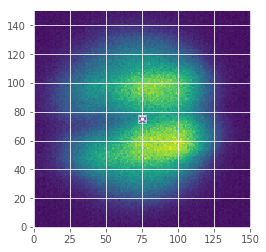



1 => /data/ait/sac/2020-09-24/SAC010975.fits
68
Object detected after filtering: 1
cx: 834.95  cy: 570.11


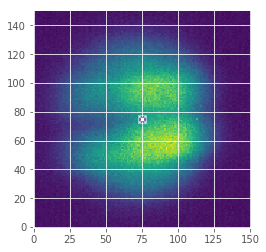



2 => /data/ait/sac/2020-09-24/SAC010976.fits
77
Object detected after filtering: 2
cx: 837.95  cy: 571.74


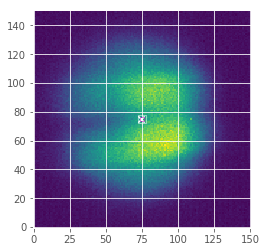



3 => /data/ait/sac/2020-09-24/SAC010977.fits
72
Object detected after filtering: 1
cx: 840.97  cy: 573.65


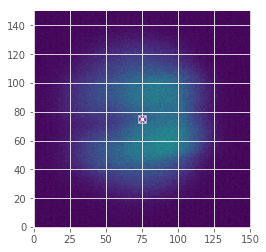



4 => /data/ait/sac/2020-09-24/SAC010978.fits
70
Object detected after filtering: 1
cx: 844.03  cy: 574.91


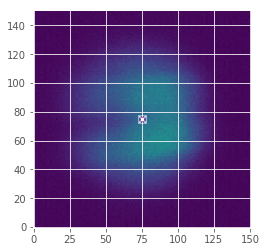



5 => /data/ait/sac/2020-09-24/SAC010979.fits
74
Object detected after filtering: 1
cx: 847.67  cy: 574.75


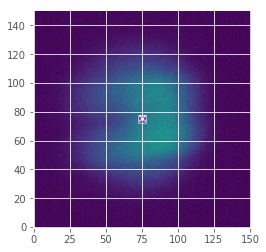



6 => /data/ait/sac/2020-09-24/SAC010980.fits
69
Object detected after filtering: 1
cx: 852.07  cy: 576.79


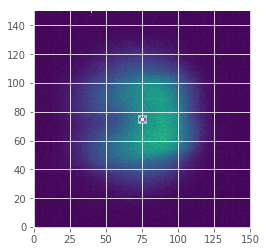



7 => /data/ait/sac/2020-09-24/SAC010981.fits
72
Object detected after filtering: 1
cx: 855.08  cy: 577.42


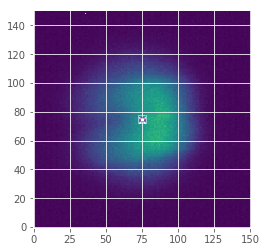



8 => /data/ait/sac/2020-09-24/SAC010982.fits
69
Object detected after filtering: 1
cx: 858.24  cy: 577.97


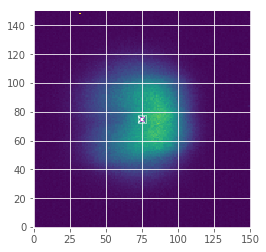



9 => /data/ait/sac/2020-09-24/SAC010983.fits
72
Object detected after filtering: 1
cx: 862.14  cy: 578.56


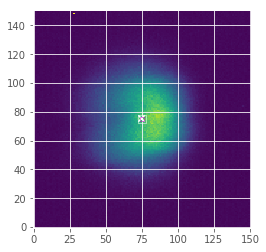



10 => /data/ait/sac/2020-09-24/SAC010984.fits
73
Object detected after filtering: 1
cx: 865.73  cy: 578.98


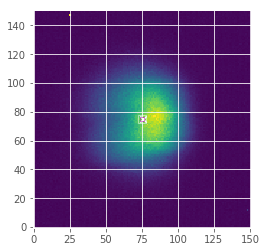



11 => /data/ait/sac/2020-09-24/SAC010985.fits
69
Object detected after filtering: 1
cx: 869.75  cy: 579.50


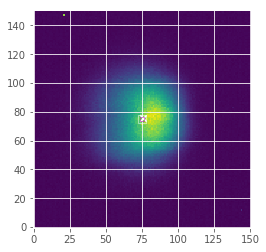



12 => /data/ait/sac/2020-09-24/SAC010986.fits
70
Object detected after filtering: 1
cx: 873.59  cy: 579.79


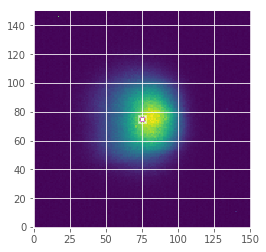



13 => /data/ait/sac/2020-09-24/SAC010987.fits
72
Object detected after filtering: 1
cx: 877.33  cy: 580.36


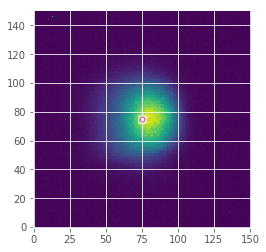



14 => /data/ait/sac/2020-09-24/SAC010988.fits
69
Object detected after filtering: 1
cx: 881.06  cy: 580.64


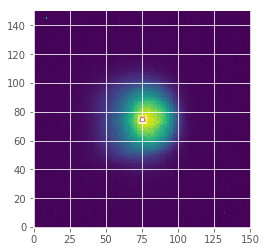



15 => /data/ait/sac/2020-09-24/SAC010989.fits
70
Object detected after filtering: 1
cx: 884.78  cy: 581.02


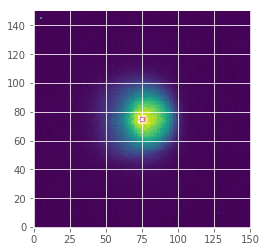



16 => /data/ait/sac/2020-09-24/SAC010990.fits
71
Object detected after filtering: 1
cx: 888.37  cy: 581.48


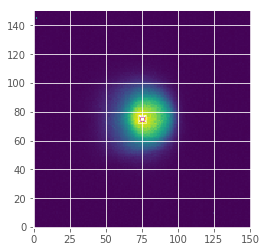



17 => /data/ait/sac/2020-09-24/SAC010991.fits
72
Object detected after filtering: 1
cx: 892.69  cy: 582.02


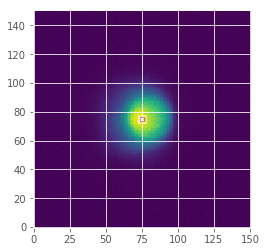



18 => /data/ait/sac/2020-09-24/SAC010992.fits
74
Object detected after filtering: 1
cx: 896.24  cy: 582.28


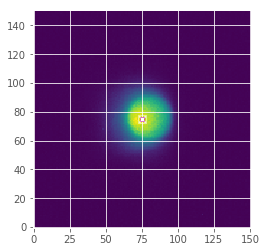



19 => /data/ait/sac/2020-09-24/SAC010993.fits
71
Object detected after filtering: 1
cx: 899.82  cy: 582.52


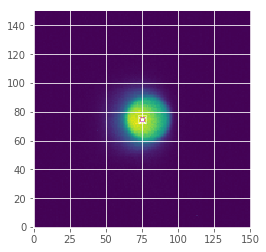



20 => /data/ait/sac/2020-09-24/SAC010994.fits
71
Object detected after filtering: 1
cx: 903.78  cy: 582.82


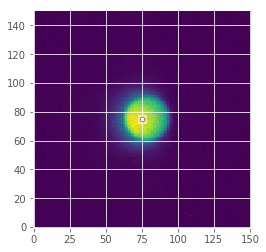



21 => /data/ait/sac/2020-09-24/SAC010995.fits
67
Object detected after filtering: 1
cx: 907.37  cy: 583.54


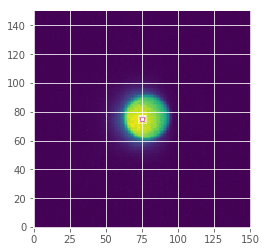



22 => /data/ait/sac/2020-09-24/SAC010996.fits
74
Object detected after filtering: 1
cx: 910.18  cy: 583.32


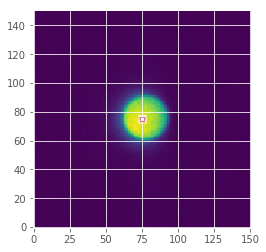



23 => /data/ait/sac/2020-09-24/SAC010997.fits
71
Object detected after filtering: 1
cx: 914.13  cy: 583.56


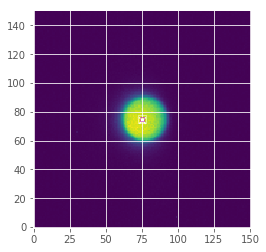



24 => /data/ait/sac/2020-09-24/SAC010998.fits
71
Object detected after filtering: 1
cx: 918.12  cy: 584.13


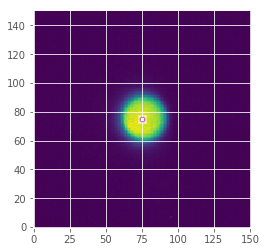



25 => /data/ait/sac/2020-09-24/SAC010999.fits
71
Object detected after filtering: 2
cx: 922.08  cy: 584.37


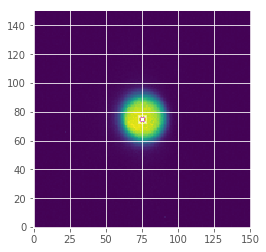



26 => /data/ait/sac/2020-09-24/SAC011000.fits
72
Object detected after filtering: 2
cx: 925.79  cy: 584.79


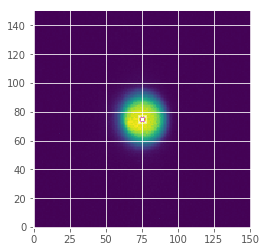



27 => /data/ait/sac/2020-09-24/SAC011001.fits
74
Object detected after filtering: 3
cx: 929.69  cy: 585.20


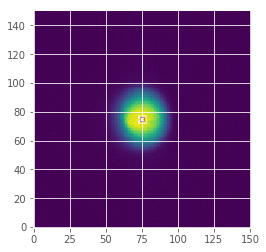



28 => /data/ait/sac/2020-09-24/SAC011002.fits
70
Object detected after filtering: 2
cx: 933.26  cy: 585.77


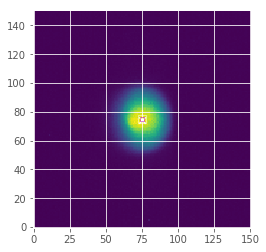



29 => /data/ait/sac/2020-09-24/SAC011003.fits
67
Object detected after filtering: 2
cx: 937.22  cy: 586.19


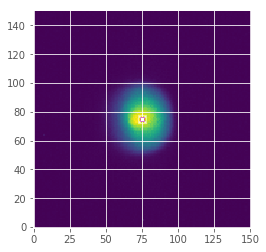



30 => /data/ait/sac/2020-09-24/SAC011004.fits
76
Object detected after filtering: 2
cx: 940.94  cy: 586.91


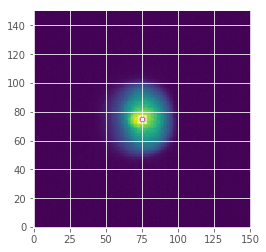



31 => /data/ait/sac/2020-09-24/SAC011005.fits
71
Object detected after filtering: 3
cx: 944.59  cy: 587.43


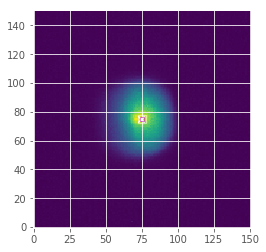



32 => /data/ait/sac/2020-09-24/SAC011006.fits
73
Object detected after filtering: 3
cx: 948.68  cy: 587.73


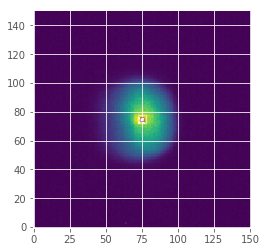



33 => /data/ait/sac/2020-09-24/SAC011007.fits
72
Object detected after filtering: 3
cx: 952.55  cy: 588.23


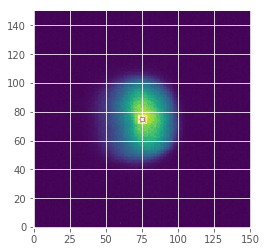



34 => /data/ait/sac/2020-09-24/SAC011008.fits
68
Object detected after filtering: 3
cx: 956.42  cy: 588.74


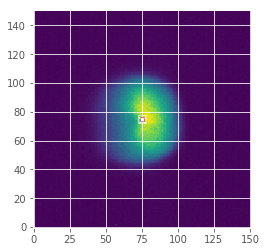



35 => /data/ait/sac/2020-09-24/SAC011009.fits
74
Object detected after filtering: 2
cx: 960.05  cy: 589.18


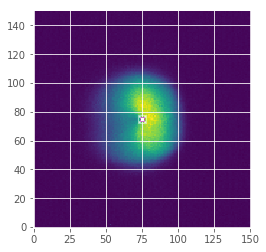



36 => /data/ait/sac/2020-09-24/SAC011010.fits
73
Object detected after filtering: 2
cx: 963.95  cy: 589.95


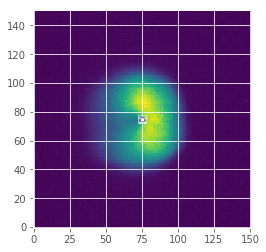



37 => /data/ait/sac/2020-09-24/SAC011011.fits
72
Object detected after filtering: 2
cx: 967.71  cy: 590.33


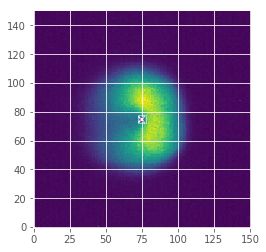



38 => /data/ait/sac/2020-09-24/SAC011012.fits
69
Object detected after filtering: 1
cx: 971.61  cy: 590.88


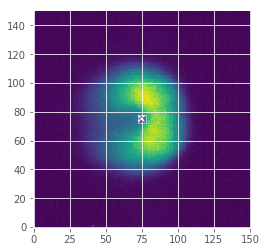



39 => /data/ait/sac/2020-09-24/SAC011013.fits
69
Object detected after filtering: 1
cx: 975.38  cy: 591.58


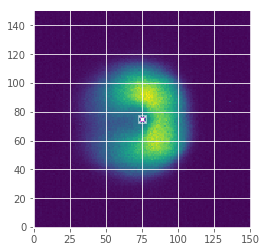



40 => /data/ait/sac/2020-09-24/SAC011014.fits
69
Object detected after filtering: 2
cx: 979.40  cy: 592.05


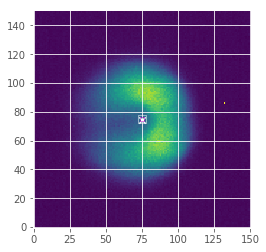



41 => /data/ait/sac/2020-09-24/SAC011015.fits
73
Object detected after filtering: 2
cx: 983.16  cy: 592.77


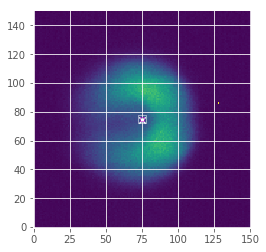



42 => /data/ait/sac/2020-09-24/SAC011016.fits
73
Object detected after filtering: 2
cx: 987.25  cy: 592.88


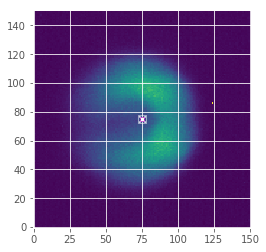



43 => /data/ait/sac/2020-09-24/SAC011017.fits
77
Object detected after filtering: 1
cx: 991.35  cy: 595.49


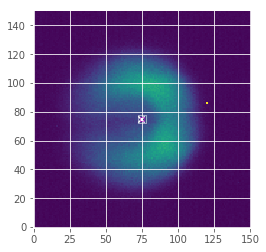



44 => /data/ait/sac/2020-09-24/SAC011018.fits
76
Object detected after filtering: 3
cx: 1003.56  cy: 593.32


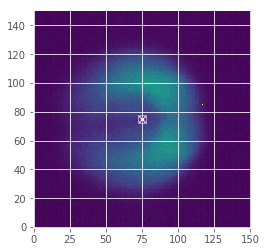



45 => /data/ait/sac/2020-09-24/SAC011019.fits
71
Object detected after filtering: 1
cx: 1006.81  cy: 594.00


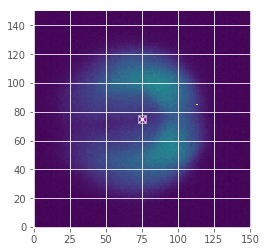



46 => /data/ait/sac/2020-09-24/SAC011020.fits
70
Object detected after filtering: 2
cx: 1010.04  cy: 594.70


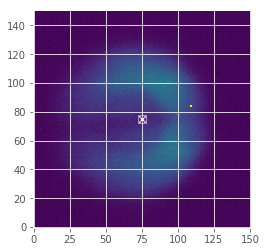



47 => /data/ait/sac/2020-09-24/SAC011021.fits
73
Object detected after filtering: 1
cx: 1013.33  cy: 595.42


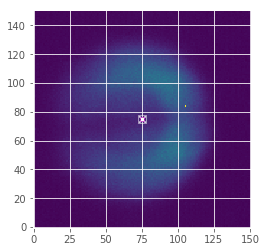



48 => /data/ait/sac/2020-09-24/SAC011022.fits
70
Object detected after filtering: 1
cx: 1016.32  cy: 596.19


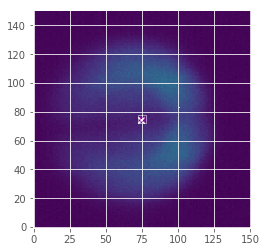



49 => /data/ait/sac/2020-09-24/SAC011023.fits
73
Object detected after filtering: 2
cx: 1020.53  cy: 588.37


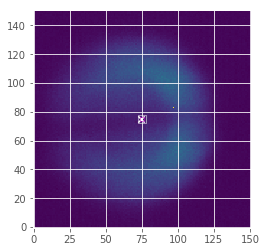



50 => /data/ait/sac/2020-09-24/SAC011024.fits
73
Object detected after filtering: 2
cx: 1027.64  cy: 586.26


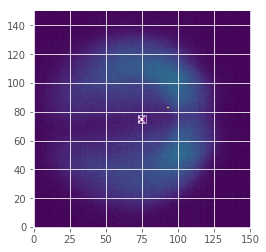



51 => /data/ait/sac/2020-09-24/SAC011025.fits
71
Object detected after filtering: 2
cx: 1031.71  cy: 585.30


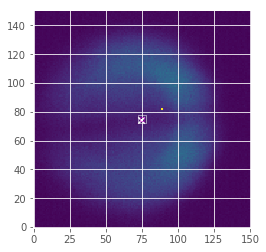



52 => /data/ait/sac/2020-09-24/SAC011026.fits
70
Object detected after filtering: 2
cx: 1037.55  cy: 581.52


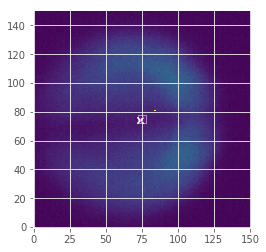



53 => /data/ait/sac/2020-09-24/SAC011027.fits
73
Object detected after filtering: 2
cx: 1043.05  cy: 582.66


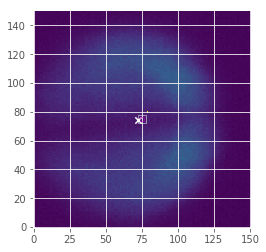



0 => /data/ait/sac/2020-09-24/SAC011034.fits
70
Object detected after filtering: 1
cx: 908.65  cy: 581.46


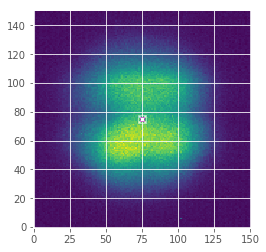



1 => /data/ait/sac/2020-09-24/SAC011035.fits
66
Object detected after filtering: 2
cx: 910.46  cy: 582.45


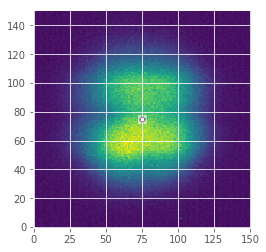



2 => /data/ait/sac/2020-09-24/SAC011036.fits
67
Object detected after filtering: 1
cx: 910.64  cy: 583.28


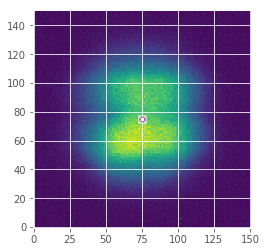



3 => /data/ait/sac/2020-09-24/SAC011037.fits
65
Object detected after filtering: 1
cx: 911.34  cy: 584.70


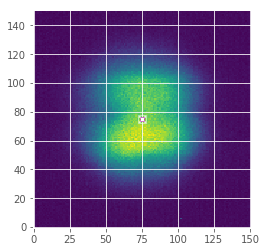



4 => /data/ait/sac/2020-09-24/SAC011038.fits
70
Object detected after filtering: 2
cx: 911.11  cy: 584.82


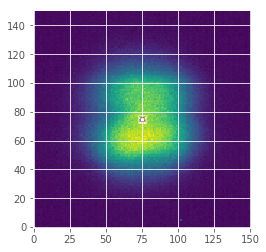



5 => /data/ait/sac/2020-09-24/SAC011039.fits
69
Object detected after filtering: 2
cx: 911.06  cy: 585.16


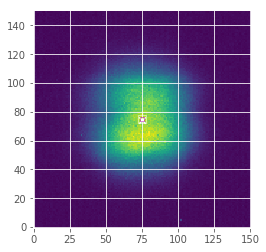



6 => /data/ait/sac/2020-09-24/SAC011040.fits
69
Object detected after filtering: 1
cx: 911.57  cy: 585.24


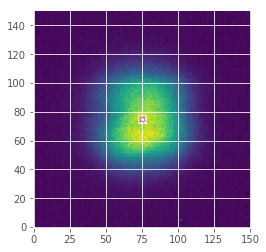



7 => /data/ait/sac/2020-09-24/SAC011041.fits
71
Object detected after filtering: 2
cx: 911.85  cy: 585.78


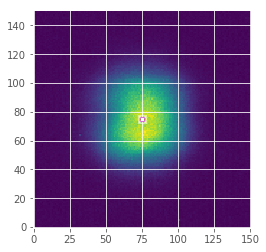



8 => /data/ait/sac/2020-09-24/SAC011042.fits
74
Object detected after filtering: 2
cx: 911.92  cy: 586.56


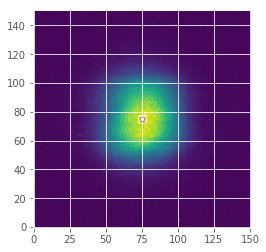



9 => /data/ait/sac/2020-09-24/SAC011043.fits
69
Object detected after filtering: 2
cx: 911.95  cy: 586.76


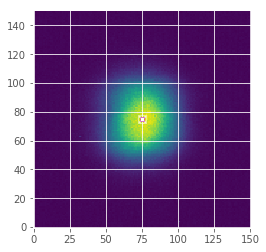



10 => /data/ait/sac/2020-09-24/SAC011044.fits
71
Object detected after filtering: 2
cx: 911.99  cy: 586.98


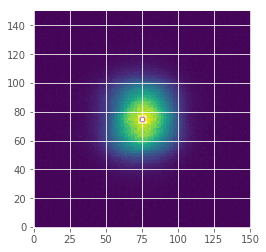



11 => /data/ait/sac/2020-09-24/SAC011045.fits
72
Object detected after filtering: 1
cx: 912.38  cy: 587.13


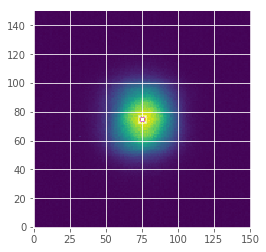



12 => /data/ait/sac/2020-09-24/SAC011046.fits
69
Object detected after filtering: 2
cx: 912.73  cy: 587.22


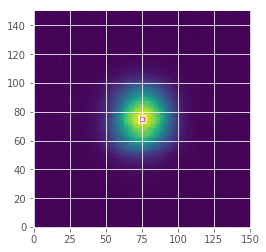



13 => /data/ait/sac/2020-09-24/SAC011047.fits
73
Object detected after filtering: 2
cx: 913.23  cy: 587.28


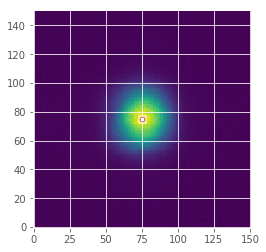



14 => /data/ait/sac/2020-09-24/SAC011048.fits
65
Object detected after filtering: 2
cx: 913.72  cy: 587.33


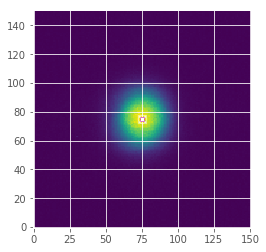



15 => /data/ait/sac/2020-09-24/SAC011049.fits
68
Object detected after filtering: 1
cx: 914.01  cy: 587.51


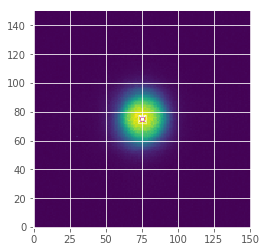



16 => /data/ait/sac/2020-09-24/SAC011050.fits
74
Object detected after filtering: 1
cx: 914.07  cy: 587.71


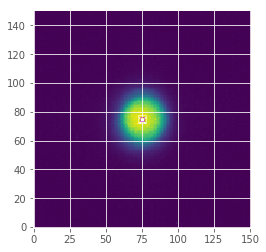



17 => /data/ait/sac/2020-09-24/SAC011051.fits
69
Object detected after filtering: 1
cx: 914.07  cy: 588.00


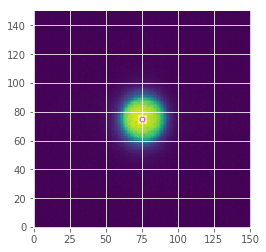



18 => /data/ait/sac/2020-09-24/SAC011052.fits
74
Object detected after filtering: 1
cx: 914.18  cy: 588.06


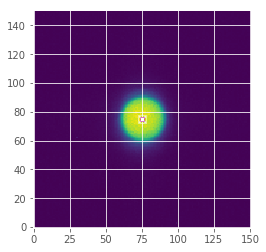



19 => /data/ait/sac/2020-09-24/SAC011053.fits
72
Object detected after filtering: 1
cx: 914.17  cy: 588.08


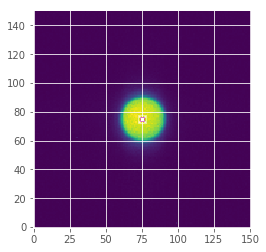



20 => /data/ait/sac/2020-09-24/SAC011054.fits
73
Object detected after filtering: 1
cx: 914.52  cy: 588.25


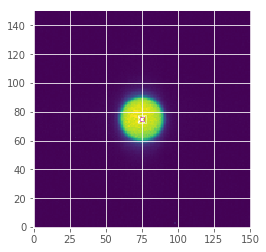



21 => /data/ait/sac/2020-09-24/SAC011055.fits
70
Object detected after filtering: 1
cx: 914.15  cy: 588.71


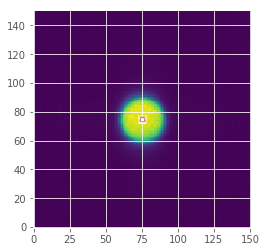



22 => /data/ait/sac/2020-09-24/SAC011056.fits
76
Object detected after filtering: 2
cx: 913.44  cy: 588.46


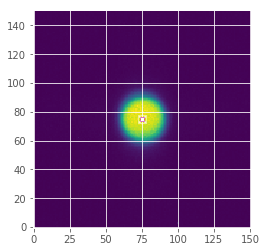



23 => /data/ait/sac/2020-09-24/SAC011057.fits
72
Object detected after filtering: 1
cx: 913.62  cy: 588.45


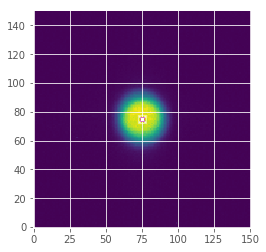



24 => /data/ait/sac/2020-09-24/SAC011058.fits
71
Object detected after filtering: 1
cx: 914.07  cy: 588.65


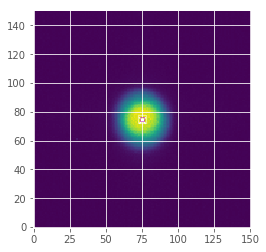



25 => /data/ait/sac/2020-09-24/SAC011059.fits
73
Object detected after filtering: 1
cx: 914.08  cy: 588.62


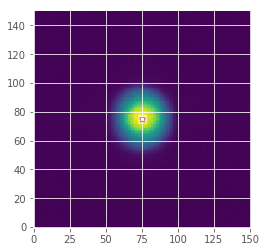



26 => /data/ait/sac/2020-09-24/SAC011060.fits
71
Object detected after filtering: 1
cx: 914.10  cy: 588.96


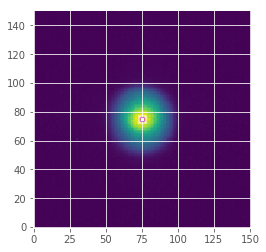



27 => /data/ait/sac/2020-09-24/SAC011061.fits
73
Object detected after filtering: 1
cx: 914.04  cy: 589.12


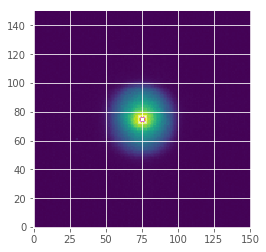



28 => /data/ait/sac/2020-09-24/SAC011062.fits
68
Object detected after filtering: 1
cx: 913.97  cy: 589.28


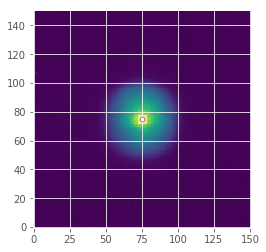



29 => /data/ait/sac/2020-09-24/SAC011063.fits
71
Object detected after filtering: 2
cx: 913.92  cy: 589.52


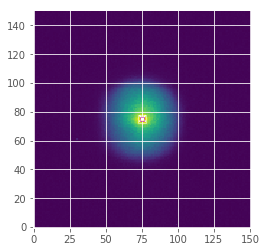



30 => /data/ait/sac/2020-09-24/SAC011064.fits
73
Object detected after filtering: 2
cx: 913.95  cy: 590.04


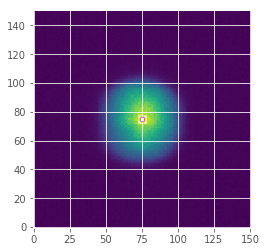



31 => /data/ait/sac/2020-09-24/SAC011065.fits
72
Object detected after filtering: 1
cx: 914.00  cy: 590.27


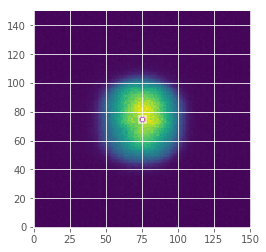



32 => /data/ait/sac/2020-09-24/SAC011066.fits
71
Object detected after filtering: 2
cx: 914.08  cy: 590.53


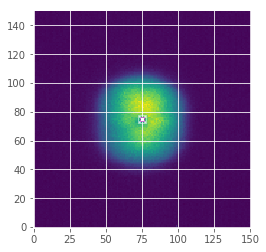



33 => /data/ait/sac/2020-09-24/SAC011067.fits
73
Object detected after filtering: 2
cx: 914.32  cy: 590.68


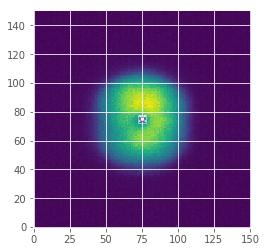



34 => /data/ait/sac/2020-09-24/SAC011068.fits
74
Object detected after filtering: 2
cx: 914.50  cy: 590.85


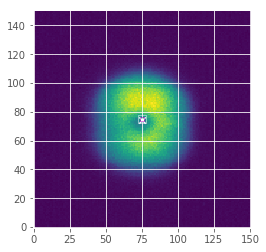



35 => /data/ait/sac/2020-09-24/SAC011069.fits
77
Object detected after filtering: 2
cx: 914.96  cy: 591.15


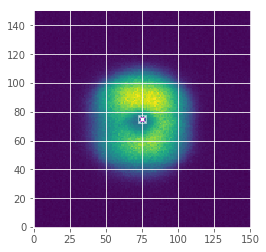



36 => /data/ait/sac/2020-09-24/SAC011070.fits
72
Object detected after filtering: 2
cx: 915.77  cy: 563.50


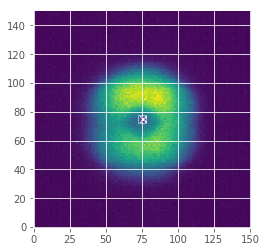



37 => /data/ait/sac/2020-09-24/SAC011071.fits
69
Object detected after filtering: 3
cx: 915.76  cy: 563.25


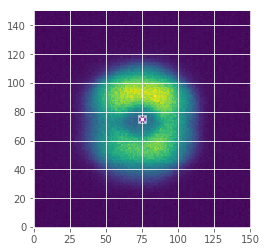



38 => /data/ait/sac/2020-09-24/SAC011072.fits
74
Object detected after filtering: 2
cx: 916.30  cy: 562.64


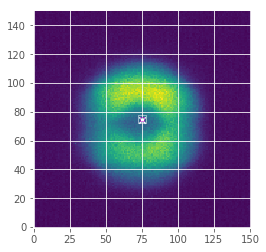



39 => /data/ait/sac/2020-09-24/SAC011073.fits
72
Object detected after filtering: 3
cx: 916.84  cy: 562.23


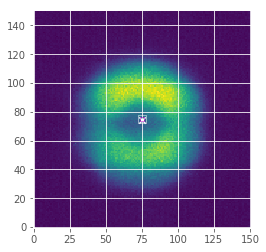



40 => /data/ait/sac/2020-09-24/SAC011074.fits
75
Object detected after filtering: 3
cx: 917.29  cy: 561.26


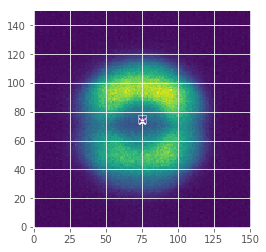



41 => /data/ait/sac/2020-09-24/SAC011075.fits
72
Object detected after filtering: 4
cx: 917.89  cy: 560.27


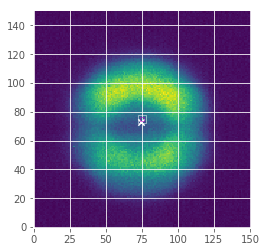



42 => /data/ait/sac/2020-09-24/SAC011076.fits
69
Object detected after filtering: 2
cx: 917.92  cy: 595.27


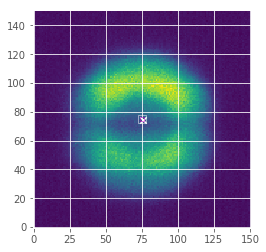



43 => /data/ait/sac/2020-09-24/SAC011077.fits
76
Object detected after filtering: 3
cx: 918.69  cy: 596.88


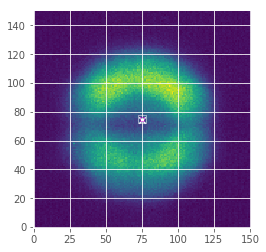



44 => /data/ait/sac/2020-09-24/SAC011078.fits
69
Object detected after filtering: 4
cx: 919.83  cy: 597.77


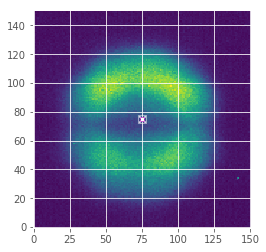



45 => /data/ait/sac/2020-09-24/SAC011079.fits
73
Object detected after filtering: 4
cx: 922.83  cy: 599.51


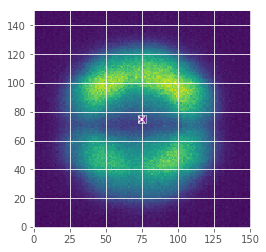



46 => /data/ait/sac/2020-09-24/SAC011080.fits
70
Object detected after filtering: 4
cx: 925.81  cy: 599.71


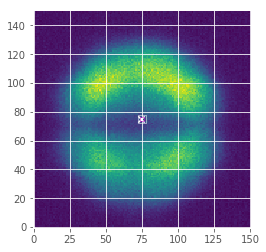



47 => /data/ait/sac/2020-09-24/SAC011081.fits
72
Object detected after filtering: 5
cx: 924.89  cy: 603.64


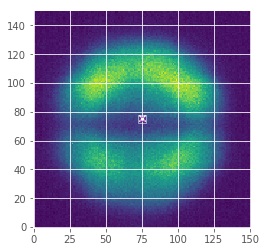



48 => /data/ait/sac/2020-09-24/SAC011082.fits
75
Object detected after filtering: 4
cx: 927.86  cy: 602.06


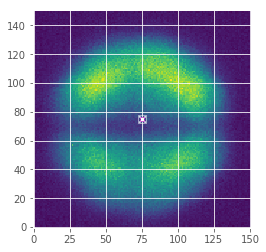



49 => /data/ait/sac/2020-09-24/SAC011083.fits
73
Object detected after filtering: 4
cx: 932.27  cy: 604.90


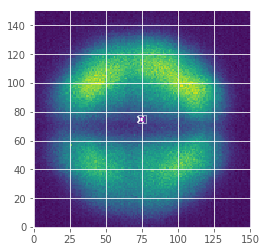



50 => /data/ait/sac/2020-09-24/SAC011084.fits
74
Object detected after filtering: 4
cx: 934.92  cy: 606.50


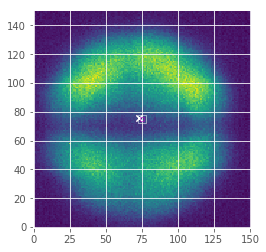



51 => /data/ait/sac/2020-09-24/SAC011085.fits
72
Object detected after filtering: 5
cx: 935.86  cy: 605.69


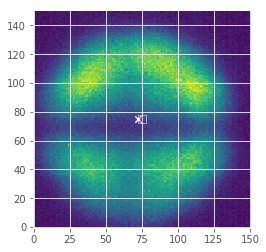



52 => /data/ait/sac/2020-09-24/SAC011086.fits
70
Object detected after filtering: 4
cx: 899.76  cy: 614.08


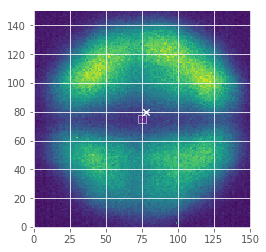



53 => /data/ait/sac/2020-09-24/SAC011087.fits
70
Object detected after filtering: 4
cx: 942.17  cy: 609.33


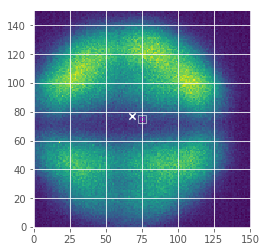



0 => /data/ait/sac/2020-09-24/SAC011094.fits
71
Object detected after filtering: 2
cx: 893.21  cy: 569.03


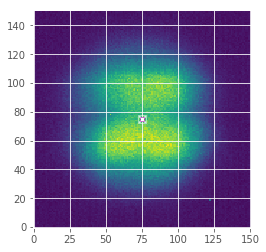



1 => /data/ait/sac/2020-09-24/SAC011095.fits
67
Object detected after filtering: 1
cx: 891.42  cy: 571.23


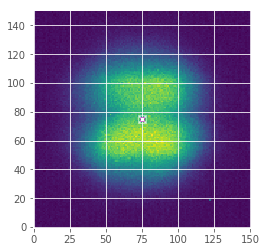



2 => /data/ait/sac/2020-09-24/SAC011096.fits
65
Object detected after filtering: 1
cx: 890.01  cy: 571.60


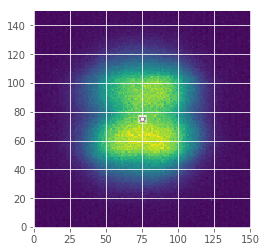



3 => /data/ait/sac/2020-09-24/SAC011097.fits
68
Object detected after filtering: 1
cx: 890.97  cy: 571.86


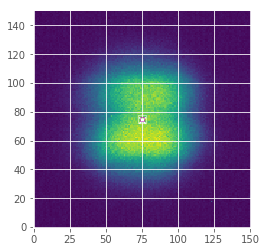



4 => /data/ait/sac/2020-09-24/SAC011098.fits
66
Object detected after filtering: 1
cx: 890.20  cy: 572.21


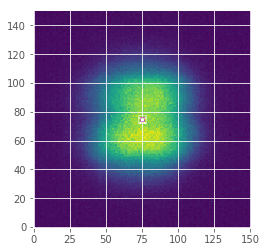



5 => /data/ait/sac/2020-09-24/SAC011099.fits
70
Object detected after filtering: 1
cx: 890.16  cy: 572.26


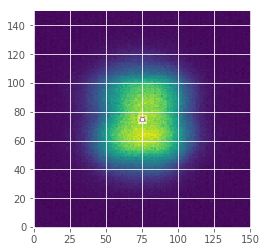



6 => /data/ait/sac/2020-09-24/SAC011100.fits
73
Object detected after filtering: 1
cx: 889.90  cy: 572.80


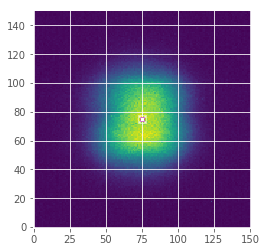



7 => /data/ait/sac/2020-09-24/SAC011101.fits
65
Object detected after filtering: 1
cx: 889.65  cy: 573.15


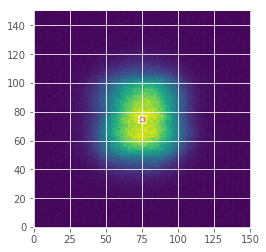



8 => /data/ait/sac/2020-09-24/SAC011102.fits
65
Object detected after filtering: 1
cx: 889.43  cy: 572.94


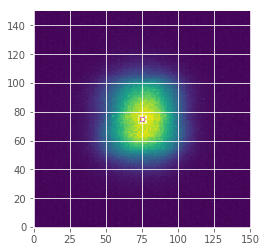



9 => /data/ait/sac/2020-09-24/SAC011103.fits
69
Object detected after filtering: 1
cx: 889.20  cy: 573.56


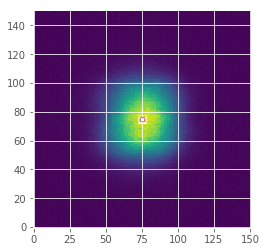



10 => /data/ait/sac/2020-09-24/SAC011104.fits
69
Object detected after filtering: 1
cx: 889.07  cy: 573.60


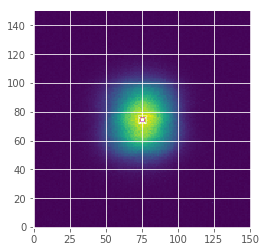



11 => /data/ait/sac/2020-09-24/SAC011105.fits
72
Object detected after filtering: 1
cx: 888.75  cy: 573.61


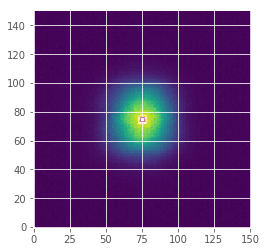



12 => /data/ait/sac/2020-09-24/SAC011106.fits
69
Object detected after filtering: 2
cx: 4242.49  cy: 855.93


/home/pfs/dev/lib/pfs/imageAnalysis.py:142: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(ee)/np.sum(roi)
/software/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1301: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


ValueError: not enough values to unpack (expected 1, got 0)

In [12]:
for experimentId in experimentIds:
    dfs.append(getSlitTF(experimentId=experimentId, com=com, head=head, tail=tail, doBck=doBck,doPrint=True, doPlot=True))

cube = pd.concat(dfs)

   

In [ ]:
cube.plot(x='fca_x',y='EE20',style='*')

In [ ]:
thfocModel= fitFocusData(cube, corrector=False, doPlot=False)

In [ ]:
focusModel = getFocusModel(thfocModel)

In [ ]:
vline = True
plotModel = True
criteria = 'EE20'
index = 'fca_x'

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
j=2

if plotModel:
    ax1.plot(zemaxData.Slitdefocus, zemaxData.MidFiber, 'o', color=colors[0], label='Zemax_MidFiber = %.3f' % zemaxMidFit.focus)
    ax1.plot(zemaxMidFit.x, zemaxMidFit.y, '--', color=colors[0])
    if vline:
        ax1.vlines(color=colors[0], **zemaxMidFit.vline)

    ax1.plot(zemaxData.Slitdefocus, zemaxData.ExtremeFiber, 'o', color=colors[1], label='Zemax_EndFiber = %.3f' % zemaxEndFit.focus)
    ax1.plot(zemaxEndFit.x, zemaxEndFit.y, '--', color=colors[1])
    if vline:
        ax1.vlines(color=colors[1], **zemaxEndFit.vline)

for experimentId, df in cube.groupby('experimentId'):
    fit = thfocModel.query("experimentId==%d"%(experimentId))
    focus = focusModel.query("experimentId==%d and criteria=='%s'"%(experimentId, criteria))
    
    ax1.plot(df[index], df[criteria], 'o', color=colors[j], 
             label='expId%d:%s = %.3f' % (experimentId, experiments.fiber[experimentId], focus[index]))
    ax1.plot(fit[index], fit[criteria], '--', color=colors[j])
    
    if vline:
        ax1.vlines(x=focus[index], ymin=fit[criteria].min(), ymax = fit[criteria].max(), color=colors[j])
    j+=1

    
lns = [line for i, line in enumerate(ax1.get_lines()) if not i % 2]
labs = [line.get_label() for line in lns]

ax1.legend(lns, labs)
ax1.set_xlabel('%s(mm)'%index)
ax1.set_ylabel(criteria)

plt.title('Slit Through focus : Zemax vs Engineering_Fibers \n Criteria : %s doBck=True' %criteria)
plt.grid()

In [ ]:
distance_fibres = 138.84
delta_focus = (1.086 - 0.633)
angle=np.arctan(delta_focus/distance_fibres)
angle_degre=(angle*180)/(np.pi)
print(angle_degre)


In [ ]:
((0.648+0.658)/2) - 0.309


In [ ]:
0.270-0.0062

In [ ]:
1.532-0.885